Merton model

In [1]:
import scipy.stats as si
from sympy import init_printing
init_printing()



def bs_call(v, D, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / D) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = (v * si.norm.cdf(d1, 0.0, 1.0) - D * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))

    return call

def merton_equity(v, d, sigma, r, t,T):
    """
    v - Value of firm
    d - ZCB value
    sigma - volatility
    r - riskfree interest rate
    T - Last period
    t - current period
    """
    period = T-t

    d1 = (np.log(v / d) + (0.5 * sigma ** 2) * period + r * period) / (sigma * np.sqrt(period))
    d2 = d1 - sigma * np.sqrt(period)

    equity = (v * si.norm.cdf(d1, 0.0, 1.0) - d * np.exp(-r * period) * si.norm.cdf(d2, 0.0, 1.0))

    return equity

def merton_debt(v, d, sigma, r, t, T):
    debt = v - merton_equity(v, d, sigma, r, t, T)

    return debt


Making a DataFrame to illustrate the value debt and equity as a fuction of the firm's asset value

c:\users\johan\onedrive - university of copenhagen\8. semester\kreditrisiko\python\venv\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


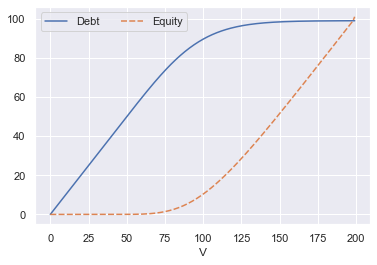

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.linspace(0, 200, 200,  dtype=int), columns=['V'] )

param = {
            "v": 180,
            "Ds": 50,
            "Dj": 50,
            "r": 0.01,
            "sigma": 0.25,
            "T": 1
        }

df['B'] = merton_debt(df['V'], 100, 0.25, 0.01, 0, 1)

df['S'] = merton_equity(df['V'], 100, 0.25, 0.01, 0, 1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.lineplot(data=[df['B'],df['S']])
plt.legend(['Debt','Equity'], ncol=2, loc='upper left')
plt.xlabel('V')
# plt.ylabel('')
plt.show()

Fuctions for junior and senior debt

In [4]:

def Senior_debt(v, ds, T, r, sigma):
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / ds) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    Senior_debt = v - (v * si.norm.cdf(d1, 0.0, 1.0) - ds * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))

    return Senior_debt


def Junior_debt(v, ds, dj, T, r, sigma):
    # S     : value of firm
    # ds    : senior debt
    # dj    : junior debt
    # T     : time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / (ds+dj)) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    d1_senior = (np.log(v / ds) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2_senior = d1_senior - sigma * np.sqrt(T)

    Junior_debt = (v * si.norm.cdf(d1_senior, 0.0, 1.0) - ds * np.exp(-r * T) * si.norm.cdf(d2_senior, 0.0, 1.0)) \
                  - (v * si.norm.cdf(d1, 0.0, 1.0) - (ds+dj) * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))


    return Junior_debt


def sub_equity(v, ds, dj, T, r, sigma):
    # S     : value of firm
    # ds    : senior debt
    # dj    : junior debt
    # T     : time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset

    d1 = (np.log(v / (ds+dj)) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    sub_equity = (v * si.norm.cdf(d1, 0.0, 1.0) - (ds+dj) * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    return sub_equity

In [5]:
ZCB_DEBT_90 = merton_debt(90, 100, 0.25, 0.01, 0, 1)
ZCB_DEBT_180 = merton_debt(180, 100, 0.25, 0.01, 0, 1)

Debt_senior_90 = Senior_debt(90, 50, 1, 0.01, 0.25)
Debt_senior_180 = Senior_debt(180, 50, 1, 0.01, 0.25)

Debt_junior_90 = Junior_debt(90, 50, 50, 1, 0.01, 0.25)
Debt_junior_180 = Junior_debt(180, 50, 50, 1, 0.01, 0.25)


Creating a DataFrame to show the credit spread


def credit_spread(v,